# Pymaceuticals Inc.
---

### Analysis

The dataset contains information on various drug regimens used to treat cancer in mice, including tumor volume and metastatic sites. With mice of both sexes and a range of ages, the data allows for a comprehensive analysis of the effectiveness of different treatments. Key variables to consider include drug regimen, tumor volume, metastatic sites, and timepoint.
 

In [229]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview

mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [162]:
# Checking the number of mice.
mouse_study_count = mouse_study_df['Mouse ID'].nunique()
mouse_study_count

249

In [163]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_dups = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
mouse_study_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [237]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_study_ids = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID'], keep=False)]['Mouse ID'].unique()
mouse_data_dups = mouse_study_df[mouse_study_df['Mouse ID'].isin(mouse_study_ids)]

mouse_data_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [238]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_no_dups = mouse_data_dups.drop_duplicates(subset = 'Mouse ID') 

mouse_no_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [166]:
# Checking the number of mice in the clean DataFrame.

mouse_count = len(mouse_no_dups)

mouse_count


237

## Summary Statistics

In [167]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_mean = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename("mean")
mouse_median = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().rename("median")
mouse_var = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().rename("var")
mouse_std = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().rename("std")
mouse_sem = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().rename("sem")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

stat_df = [mouse_mean, mouse_median, mouse_var, mouse_std, mouse_sem]
mouse_tumor_summary = reduce(lambda left, right: pd.merge(left, right, on="Drug Regimen", how="inner"), stat_df)
mouse_tumor_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [168]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

mouse_tumor_summary = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
mouse_tumor_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Rows for Each Drug Regimen')

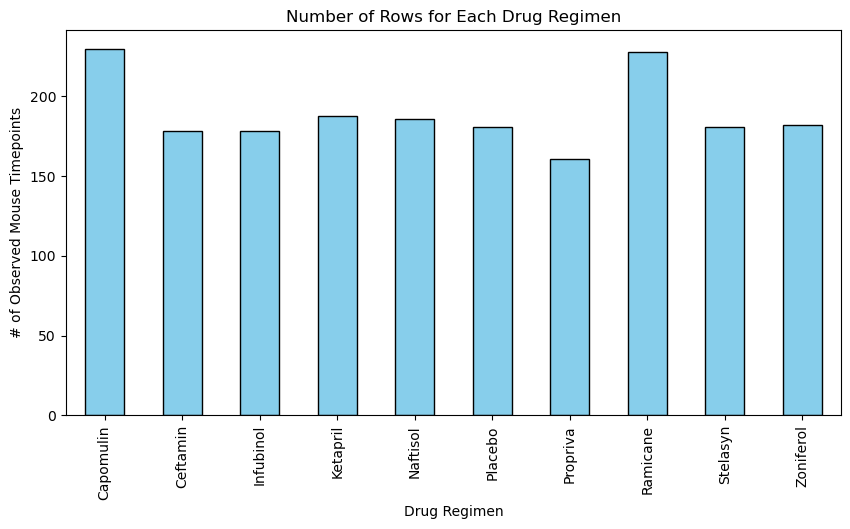

In [169]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mouse_tumor_pd = mouse_study_df.groupby('Drug Regimen')['Mouse ID'].count()

ax = mouse_tumor_pd.plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='black', label='Number of Rows')

ax.set_ylabel('# of Observed Mouse Timepoints')
ax.set_title('Number of Rows for Each Drug Regimen')


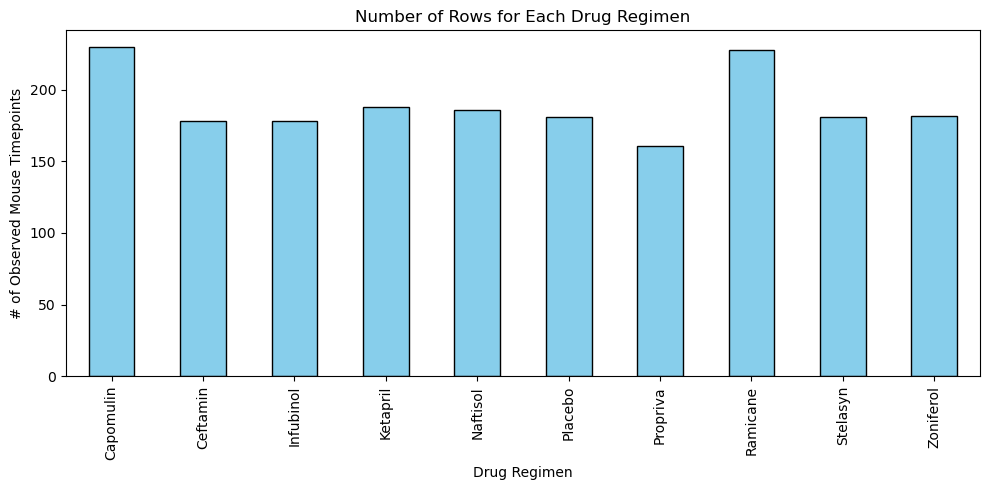

In [170]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

mouse_tumor_summary = mouse_study_df.groupby('Drug Regimen')['Timepoint'].count()
mouse_tumor_summary.plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='black')
plt.title('Number of Rows for Each Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Female Mice vs Male Mice')

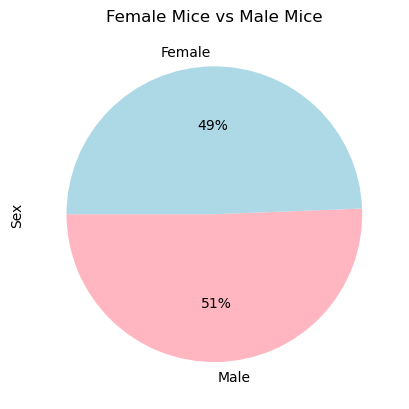

In [171]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

m_f_percent = mouse_study_df['Sex'].value_counts(normalize=True) * 100

ax = m_f_percent.plot(kind='pie', autopct='%0.0f%%', startangle=180, colors=['lightpink', 'lightblue'])

ax.set_ylabel('Sex')
ax.set_title('Female Mice vs Male Mice')

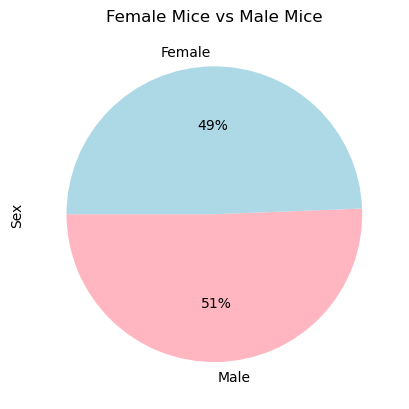

In [172]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

m_f_percent = mouse_study_df['Sex'].value_counts(normalize=True) * 100

m_f_percent.plot(kind='pie', autopct='%0.0f%%', startangle=180, colors=['lightpink', 'lightblue'])

plt.ylabel('Sex')
plt.title('Female Mice vs Male Mice')
plt.tight_layout
plt.show()

## Quartiles, Outliers and Boxplots

In [239]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

filter_drug_df = mouse_study_df[mouse_study_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])]
group_drug_df = filter_drug_df.groupby('Mouse ID')

# Start by getting the last (greatest) timepoint for each mouse

timepoint = group_drug_df['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_volume_df = pd.merge(timepoint, filter_drug_df, on=['Mouse ID', 'Timepoint'])
final_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [213]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = mouse_study_df['Drug Regimen'].unique()
    
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for drug in drug_list:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
        subset = mouse_study_df[mouse_study_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # add subset 
    
        tumor_vol.append(subset)

    
    # Determine outliers using upper and lower bounds

        quartiles = subset.quantile([.25, .5, .75])
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5 * iqr)
        upper_bound = upperq + (1.5 * iqr)
    
        outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
        print(f"{drug}'s potential outliers: {outliers}")

Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Placebo's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Stelasyn's potential outliers: 1179    75.12369
Name: Tumor Volume (mm3), dtype: float64
Zoniferol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ketapril's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Propriva's potential outliers: 903     70.492788
1289    71.172463
1290    72.455421
1658    70.167749
Name: Tumor Volume (mm3), dtype: float64
Naftisol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


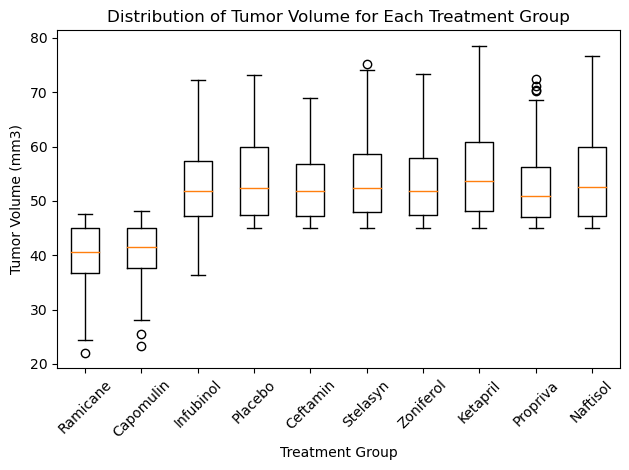

In [221]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.boxplot(tumor_vol, labels=drug_list)
ax.set_title('Distribution of Tumor Volume for Each Treatment Group')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Treatment Group')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Line and Scatter Plots

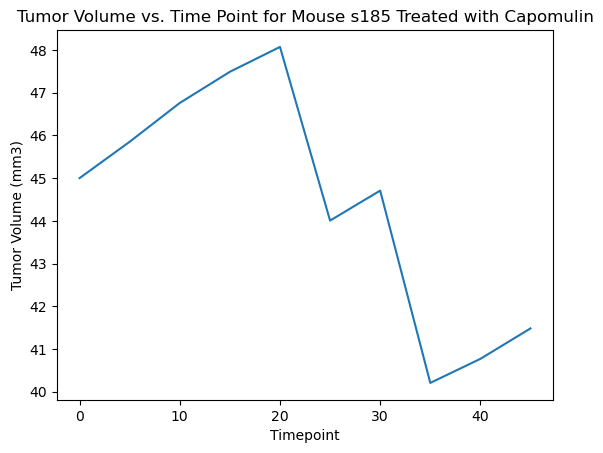

In [223]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for Capomulin and a single mouse ID
capomulin_data = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']

# Sort the data by Timepoint
single_mouse_data = single_mouse_data.sort_values('Timepoint')

# Generate the line plot
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])

# Set labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point for Mouse s185 Treated with Capomulin')

plt.show()


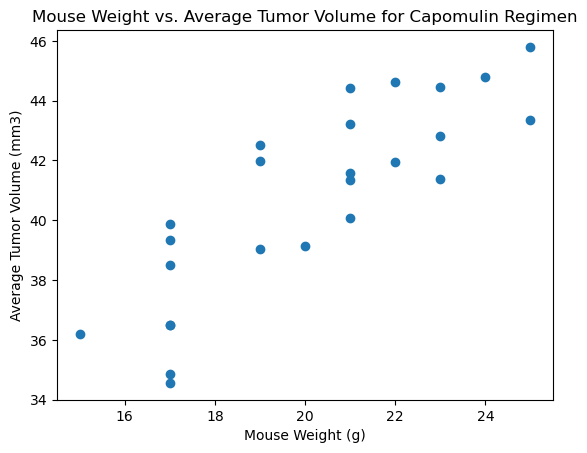

In [227]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the DataFrame to only include rows for the Capomulin regimen
capomulin_df = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']

# Group by mouse ID and calculate the average tumor volume for each mouse
grouped_df = capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'})

# Generate the scatter plot
plt.scatter(grouped_df['Weight (g)'], grouped_df['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average observed tumor volume for the Capomulin regimen is 0.841936342469472


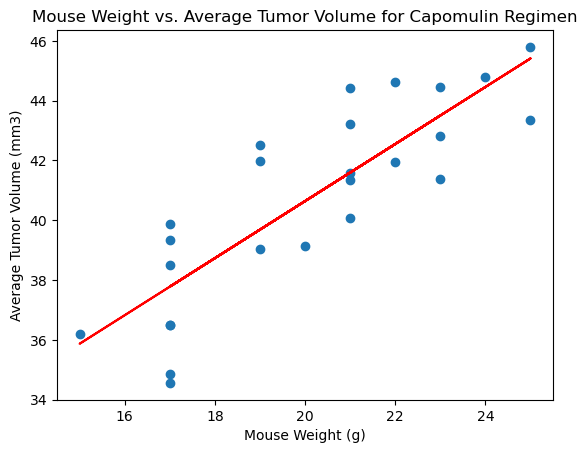

In [231]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the DataFrame to only include rows for the Capomulin regimen
capomulin_df = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']

# Group by mouse ID and calculate the average tumor volume for each mouse
grouped_df = capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'first'})

# Calculate the correlation coefficient
correlation = pearsonr(grouped_df['Weight (g)'], grouped_df['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average observed tumor volume for the Capomulin regimen is {correlation[0]}")

# Calculate the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(grouped_df['Weight (g)'], grouped_df['Tumor Volume (mm3)'])

# Generate the scatter plot with the linear regression line
plt.scatter(grouped_df['Weight (g)'], grouped_df['Tumor Volume (mm3)'])
plt.plot(grouped_df['Weight (g)'], slope*grouped_df['Weight (g)'] + intercept, 'r-')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()